# Evaluate metrics as an indicator of load

## Get a list of all benchmarks

In [1]:
from get_all_metrics import get_metrics
import compile_benchmark_metrics

RANGE = list(range(1500, 5000, 500))
PERCENTILE = '99.9'
FILENAME = '../results/phase3_final_1000000ops_'
TH_RANGE = list(range(4, 35, 3))

# Get performance data for all load for a sigle threshold
def get_performance_for_threshold(threshold):
    data_list = []
    for load in RANGE:
        node_data = list(get_metrics(FILENAME+str(threshold)+"_" + str(load)))
        data = compile_benchmark_metrics.get_statistics(node_data)
        data_list.append((data, load))
    return data_list

flatten = lambda l: [item for sublist in l for item in sublist]

all_benchmarks = list(flatten(map(lambda threshold: get_performance_for_threshold(threshold), TH_RANGE)))
all_benchmarks[0]

((367.125, 26.796875, 19.25, 0.1875), 1500)

## Parse out only one metric

In [12]:
read_throughput_list  = list(map(lambda benchmark: (benchmark[1], benchmark[0][0]), all_benchmarks))
read_variance_list    = list(map(lambda benchmark: (benchmark[1], benchmark[0][1]), all_benchmarks))
write_throughput_list = list(map(lambda benchmark: (benchmark[1], benchmark[0][2]), all_benchmarks))
write_variance_list   = list(map(lambda benchmark: (benchmark[1], benchmark[0][3]), all_benchmarks))

print(all_benchmarks[0])
print(read_throughput_list[0])
print(read_variance_list[0])
print(write_throughput_list[0])
print(write_variance_list[0])

((367.125, 26.796875, 19.25, 0.1875), 1500)
(1500, 367.125)
(1500, 26.796875)
(1500, 19.25)
(1500, 0.1875)


(367.125,
 488.25,
 610.5,
 732.25,
 856.75,
 980.0,
 1100.75,
 365.75,
 488.25,
 609.25,
 732.75,
 854.0,
 975.75,
 1096.5,
 365.75,
 488.5,
 611.375,
 733.5,
 856.25,
 977.75,
 1098.0,
 366.5,
 488.5,
 610.375,
 732.25,
 859.5,
 979.25,
 1122.125,
 366.5,
 489.0,
 610.0,
 731.5,
 854.25,
 978.0,
 1098.5,
 367.0,
 488.5,
 611.0,
 732.625,
 854.25,
 975.5,
 1104.625,
 366.0,
 489.25,
 610.75,
 733.25,
 860.75,
 976.0,
 1097.75,
 366.0,
 489.0,
 610.875,
 732.25,
 855.0,
 976.625,
 1099.5,
 366.5,
 488.25,
 610.875,
 732.25,
 857.0,
 976.0,
 1097.25,
 366.625,
 488.75,
 611.0,
 733.5,
 859.5,
 977.875,
 1099.5,
 366.5,
 488.25,
 610.75,
 732.75,
 854.5,
 976.125,
 1100.75)

## Plot the metrics

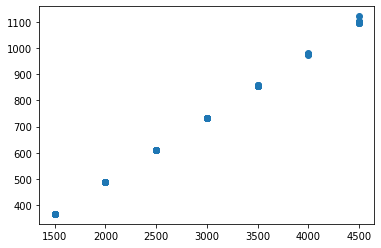

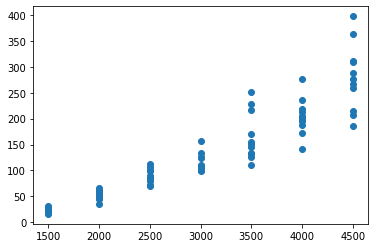

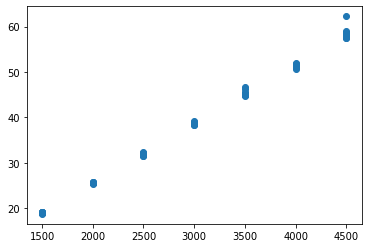

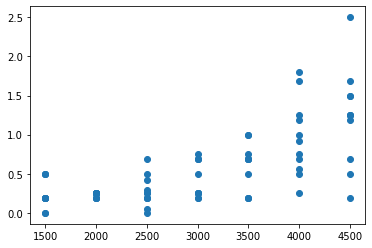

In [3]:
from matplotlib import pyplot as plt

# plt.scatter(read_throughput_list)
plt.scatter(*zip(*read_throughput_list))
plt.show()
plt.scatter(*zip(*read_variance_list))
plt.show()
plt.scatter(*zip(*write_throughput_list))
plt.show()
plt.scatter(*zip(*write_variance_list))
plt.show()

In [15]:
with open("comparing_input_metrics.csv", "w") as f:
    f.write("target, r_throughput, r_variance, w_throughput, w_variance\n")
    
    for v in zip(list(zip(*read_throughput_list))[0], list(zip(*read_throughput_list))[1], list(zip(*read_variance_list))[1], list(zip(*write_throughput_list))[1],list(zip(*write_variance_list))[1]):
        f.write(str(v)[1:-1] + "\n")